In [1]:
#!/usr/bin/env python3
#### Import all the required libraries
import pandas as pd #### Library for working with large datsets
import numpy as np #### Library for performing numerical calculations
import seaborn as sns #### Library for plotting graphs. This is a layer on top of matplotlib
import matplotlib.pyplot as plt #### Basic Library for plotting graphs
#### Configuring Matplotlib to show Plots inline
%matplotlib inline 
plt.rcParams['figure.figsize'] = (12, 12) ### Setting the size of the Plots

In [2]:
#### Load the Data File
data = pd.read_csv('https://raw.githubusercontent.com/pracasrv/machine-learning-getting-started-ws/master/data/diamonds.csv')
data.head(10) ### Print the first 10 rows of the loaded data

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


#####  Data Description as provided by the Data Provider
A data frame with 53940 rows and 10 variables:

price price in US dollars (\$326--\$18,823)

carat weight of the diamond (0.2--5.01)

cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color diamond colour, from J (worst) to D (best)

clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x length in mm (0--10.74)

y width in mm (0--58.9)

z depth in mm (0--31.8)

depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table width of top of diamond relative to widest point (43--95)

In [3]:
#### We can see that the first column is an index in the csv file, we can use this as the index for our dataframe
#### Lets reload the dataframe
data = pd.read_csv('https://raw.githubusercontent.com/pracasrv/machine-learning-getting-started-ws/master/data/diamonds.csv', index_col=0)
data.head(10) ### Print the first 10 rows of the loaded data

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [4]:
#### Lets get a feel of the data
print(data.info()) ### Float
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB
None
              carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.70

### Handling Outliers / Erroneous Values

#### Handling Erroneous Values
##### Looking at the percentile and maximum values, we can see some data anamolies in columns 'x', 'y' and 'z'. 

##### 'x', 'y' & 'z' being dimensions, can't have zero values. But We can see that features 'x', 'y' & 'z' have zero values.

##### Lets run a query for any of these values being zero and see how many rows are affected

In [5]:
df1 = data.query('x==0 | y==0 | z==0')
print(len(df1))
print(df1)

20
       carat        cut color clarity  depth  table  price     x     y    z
2208    1.00    Premium     G     SI2   59.1   59.0   3142  6.55  6.48  0.0
2315    1.01    Premium     H      I1   58.1   59.0   3167  6.66  6.60  0.0
4792    1.10    Premium     G     SI2   63.0   59.0   3696  6.50  6.47  0.0
5472    1.01    Premium     F     SI2   59.2   58.0   3837  6.50  6.47  0.0
10168   1.50       Good     G      I1   64.0   61.0   4731  7.15  7.04  0.0
11183   1.07      Ideal     F     SI2   61.6   56.0   4954  0.00  6.62  0.0
11964   1.00  Very Good     H     VS2   63.3   53.0   5139  0.00  0.00  0.0
13602   1.15      Ideal     G     VS2   59.2   56.0   5564  6.88  6.83  0.0
15952   1.14       Fair     G     VS1   57.5   67.0   6381  0.00  0.00  0.0
24395   2.18    Premium     H     SI2   59.4   61.0  12631  8.49  8.45  0.0
24521   1.56      Ideal     G     VS2   62.2   54.0  12800  0.00  0.00  0.0
26124   2.25    Premium     I     SI1   61.3   58.0  15397  8.52  8.42  0.0
26244   1

In [6]:
#### Lets first drop the rows with zero values for 'z' this should include the rows
data = data.drop(data.index[data.z == 0],axis = 0)
print(data.describe())

              carat         depth         table         price             x  \
count  53920.000000  53920.000000  53920.000000  53920.000000  53920.000000   
mean       0.797698     61.749514     57.456834   3930.993231      5.731627   
std        0.473795      1.432331      2.234064   3987.280446      1.119423   
min        0.200000     43.000000     43.000000    326.000000      3.730000   
25%        0.400000     61.000000     56.000000    949.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5323.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53920.000000  53920.000000  
mean       5.734887      3.540046  
std        1.140126      0.702530  
min        3.680000      1.070000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  


#### Handling Outlier Values

###### Next lets handle the maximum values, First lets see how they are distributed using a scatter plot

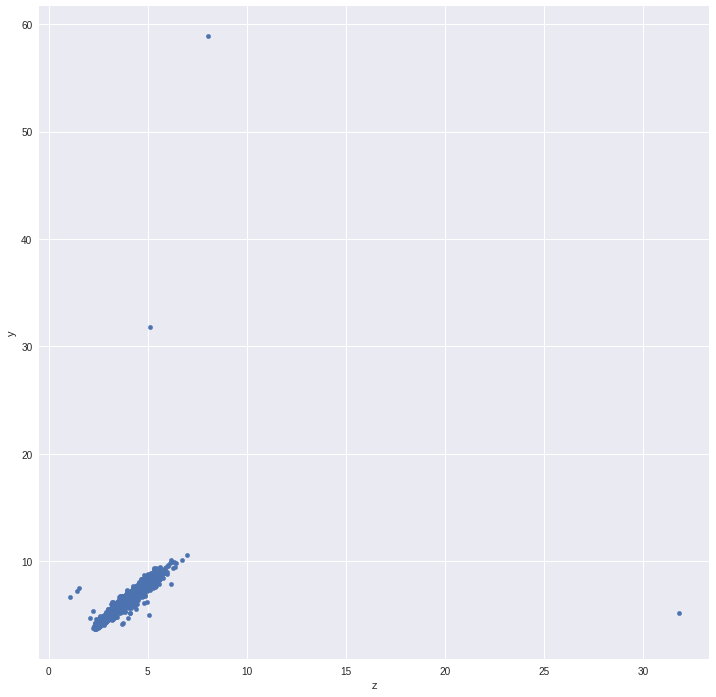

In [7]:
#### We can see that the zero values for 'x' and 'y' have also been dropped.
#### Next lets handle the maximum values
#### First lets see how they are distributed using a scatter plot
data.plot.scatter(x='z', y='y')

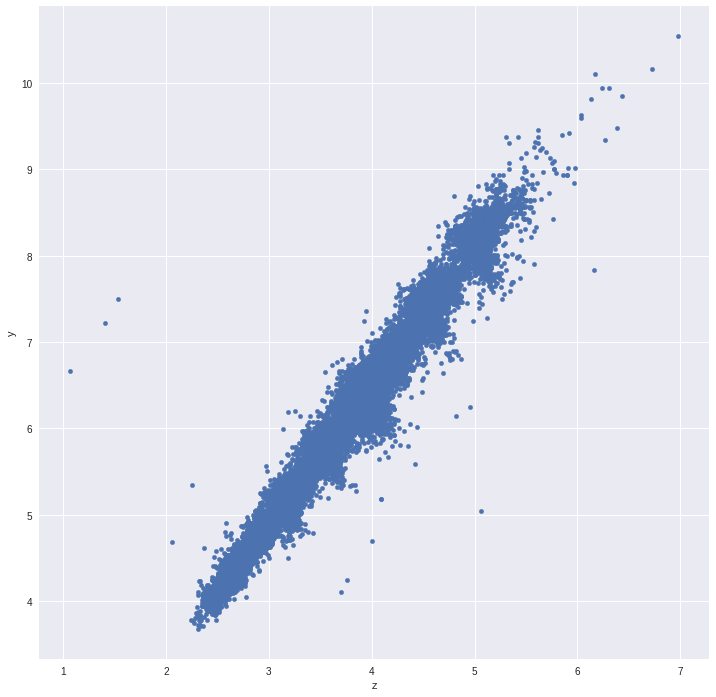

In [8]:
data = data.drop(data.index[data.z > 10],axis = 0)
data = data.drop(data.index[data.y > 20],axis = 0)
data.plot.scatter(x='z', y='y')

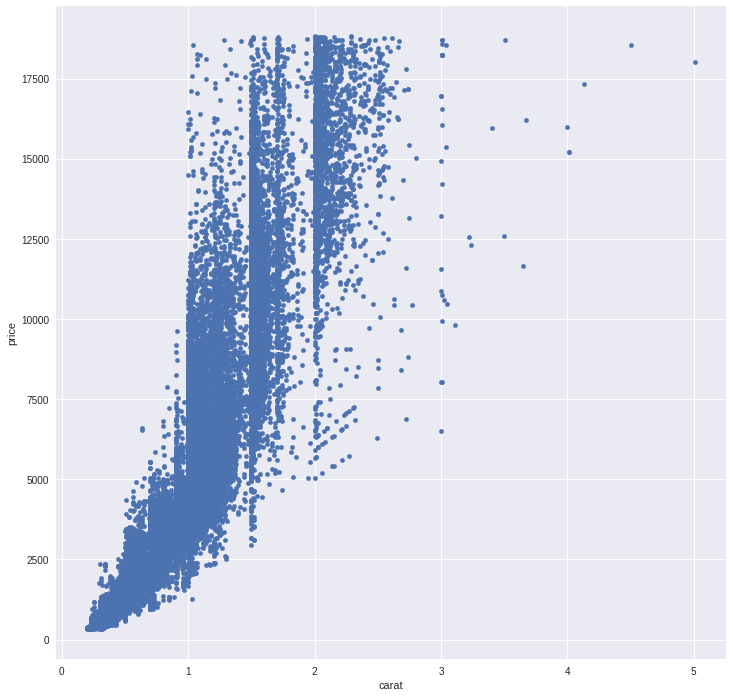

In [9]:
#### Lets next plot 'carat' against 'price' and see if  there are any outliers
data.plot.scatter(x='carat', y='price')

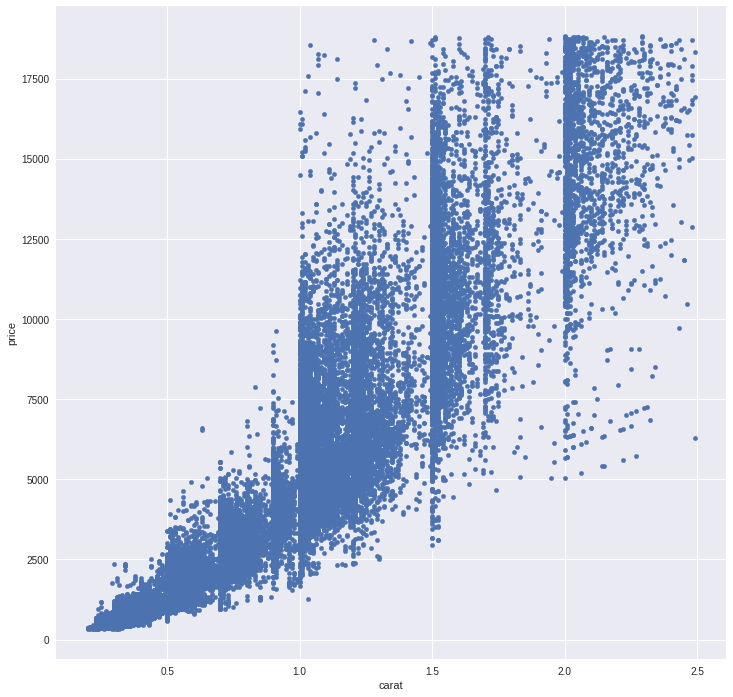

In [10]:
#### We can see that carats above 2.7 carat are acting as outliers, lets drop this data
data = data.query('carat<2.5')
data.plot.scatter(x='carat', y='price')

### Handling Categorical Values

##### In this dataset the categorical values represent quality in ascending order and hence can directly be replaced with integer values

In [11]:
#### Lets Replace the Categorical Values
clean_up_categoricals = {'cut':{'Fair':1, 'Good':2, 'Very Good':3, 'Premium':4, 'Ideal':5},
                         'color':{'D':7, 'E':6, 'F':5, 'G':4, 'H':3, 'I':2, 'J':1},
                         'clarity':{'I1':1, 'SI2':2, 'SI1':3, 'VS2':4, 'VS1':5, 'VVS2':6, 'VVS1':7, 'IF':8}
                         }
data.replace(clean_up_categoricals, inplace=True)

In [12]:
data.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31
3,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31
4,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63
5,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75
6,0.24,3,1,6,62.8,57.0,336,3.94,3.96,2.48
7,0.24,3,2,7,62.3,57.0,336,3.95,3.98,2.47
8,0.26,3,3,3,61.9,55.0,337,4.07,4.11,2.53
9,0.22,1,6,4,65.1,61.0,337,3.87,3.78,2.49
10,0.23,3,3,5,59.4,61.0,338,4.00,4.05,2.39


### Feature Engineering 

##### The three feature 'x', 'y' & 'z' can be used to create a new feature called volume. Perhaps this will have some linear relationship to price, Lets create this feature and evaluate

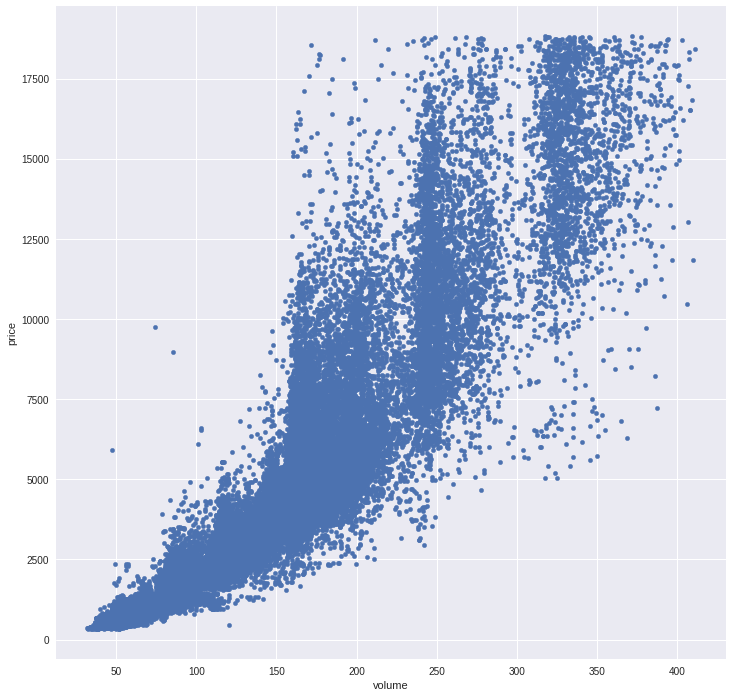

In [13]:
data['volume'] = data['x']*data['y']*data['z']
data.plot.scatter(x='volume',y='price')

In [14]:
# Splitting the dataset into the Training set and Test set - Run this cell only once
#### Extract the Dependant Variables / Labels. This has to be reshaped
#### into an 2 Dimensional array as the standard scalar object takes
#### only 2D arrays as input (its looking a single feature for multiple rows)
y = data['price'].values.reshape(-1, 1)

data = data.drop('price', axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size = 0.2, random_state = 0)

In [15]:
#### Aplly standard scaler to our dataset - all values will be scaled down from 0 to 1
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_Y = StandardScaler()
y_train = sc_Y.fit_transform(y_train)
y_test = sc_Y.transform(y_test)

/home/pracas/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [16]:
print(X_train)

[[ 1.96196809  0.08042072 -0.2446745  ...  1.67732703  1.70445934
   1.89748105]
 [-0.6310913   0.97811128  1.52131683 ... -0.59454987 -0.50204997
  -0.61238819]
 [ 1.2056591  -2.61265096 -0.83333828 ...  1.09572654  1.38298116
   1.17442207]
 ...
 [-0.76074427  0.97811128 -0.2446745  ... -0.71268746 -0.69201435
  -0.73358938]
 [-0.60948248 -0.81726984 -0.2446745  ... -0.54911233 -0.50204997
  -0.62108489]
 [-0.19891474 -0.81726984  1.52131683 ... -0.0402119   0.02400523
  -0.20582631]]


#####  Model Selection
This code contains 3 different models that you can test

1. Linear Regression
2. Decision Tree
3. Random Forest

Choose one of the Models from below by executing the code cell and then directly execute the regressor.fit() code cell

To know more about other available models, refer to 
http://scikit-learn.org/

#####  Linear  Regression Intuition

The model forms a linear equation to solve for y

y =  ax + K  
y = ax1 + bx^2 + cx^3 + K 
y = ax1 + bx2 + cx3 + dx4 + K


In [17]:
# Fitting the Linear Regression Model to the dataset
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

#####  Decision Tree Intuition

1. A Decision Tree is made up of Leaves
2. Each Leaf is a Decision Node that is based on certain values of a feature
3. The whole dataset is split into smaller groups by the leaves of the Decision Tree
4. Every new datapoint is assigned the average value of the group it falls into

In [18]:
# Fitting the Decision Tree Regression Model to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)

####  Random Forest Intuition

1. A Random Forest is a random collection of Decision Trees
2. Every new datapoint is assigned the average value of the groups it falls into across different trees


![Decision Trees](https://raw.githubusercontent.com/pracasrv/machine-learning-getting-started-ws/master/illustration-images/dt.jpg)


In [19]:
# Fitting the Random Forest Regression Model to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=300,
                                  random_state = 0)

/home/pracas/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [20]:
#### Fitting the regressor to our training set
#### y_train.ravel() is used to undo the array.reshape we performed 
#### earlier on the y_train as some of the regressor models dont
#### expect an array for the dependant variable
regressor.fit(X_train, y_train.ravel())

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [21]:
#### Predicting the Output & Doing an Inverse Transform on the Outputs
y_pred = regressor.predict(X_test)
y_pred = sc_Y.inverse_transform(y_pred)
y_test = sc_Y.inverse_transform(y_test)

In [22]:
print(y_pred)

[1398.63686111  840.00160149  546.72680183 ... 1028.02878571 4514.19503846
 1016.14304257]


In [23]:
#### Error Metrics
from sklearn.metrics import mean_squared_error
from math import sqrt

mse = mean_squared_error(y_test, y_pred)
print(mse)
rms = sqrt(mean_squared_error(y_test, y_pred))
print(rms)

278023.2881330605
527.2791368270325


#####  R2 Explained

sum of squares (residuals) = sum((y_pred - y_test)2)

sum of squares (total) = sum( (y_pred - avg(y_test)2)

R2(Squared) = 1 - (sum of squares (residuals) / sum of squares (total))

In [24]:
#### R2 Error
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

0.9823145294973259


##### K-Fold Cross Validation
K-Fold Cross Validation is a validation Technique where the given data is split into k-folds, one of the folds in witheld and the model is trained on the remaining folds, after training the model is evaluated by testing on the witheld data. This is repeated k times till all the folds of data have been withheld and tested with. This gives a more robust validation of the model than testing it on a single set of witheld data.

In [ ]:
#### Finally Lets Apply k-Fold Cross Validation to see how our model has performed
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 10)
print(accuracies.mean())
print(accuracies.std())


In [ ]:
print(accuracies)